# Creation de la base finale pour JS 

Votes et abstention

In [65]:
import pandas as pd
import geopandas as gpd
import os 
import matplotlib.pyplot as plt

In [66]:
dir=os.getcwd()

Densite de population

In [67]:
dens=pd.read_csv(dir+'\\brut\\metropole-densites-de-population-par-commune.csv',sep=';')
dens=dens.rename(columns={'Code INSEE':'insee',"Densité d'habitants (hab/km2)" : 'densitehabkm2'})
dens=dens[['insee','densitehabkm2']]

In [68]:
dens.insee=dens.insee.astype(int)
dens.dtypes

insee              int32
densitehabkm2    float64
dtype: object

Niveau de vie et taux de pauvreté

In [69]:
com=pd.read_csv(dir+'\\brut\\base-comparateur-de-territoires.csv',sep=';')
com=com.rename(columns={'CODGEO':'insee','MED16':'medianendv','TP6016':'tp'})
com=com[['insee','tp','medianendv']]

In [70]:
com.insee=com.insee.astype(int)
com.dtypes

insee           int32
tp            float64
medianendv    float64
dtype: object

In [102]:
com.head() # tp on a pas pour tout 

,insee,tp,medianendv
0,77006,NaN,26092.333333
1,77014,14.0,22116.500000
2,77018,8.0,24604.000000
3,77024,NaN,22022.222222
4,77038,NaN,29417.500000


Pollution

In [71]:
pol=pd.read_csv(dir+'\\brut\\indices_QA_commune_IDF_2017.csv',sep=',')

pol=pol.groupby('ninsee',as_index=False).mean()

pol=pol.rename(columns={'ninsee':'insee'})

In [72]:
pol.insee=pol.insee.astype(int)

In [73]:
pol.dtypes

insee      int32
no2      float64
o3       float64
pm10     float64
dtype: object

Diplomes 

In [74]:
dipl = pd.read_csv(dir+'\\brut\\base-cc-diplomes-formation-2016.csv',sep=';')

dipl=dipl.rename(columns={'P11_NSCOL15P_SUP':'dipl_sup','CODGEO':'insee'})

dipl=dipl[['insee','dipl_sup']]

C:\Users\morga\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
dipl.dtypes

insee        object
dipl_sup    float64
dtype: object

In [76]:
import numpy as np

In [77]:
dipl=dipl[pd.to_numeric(dipl['insee'], errors='coerce').notnull()]

In [78]:
dipl.insee=dipl.insee.astype(int)

Professionnels de sante

In [79]:
med=pd.read_csv(dir+'\\brut\\annuaire-et-localisation-des-professionnels-de-sante.csv',sep=';')

med=med[["Nature de l'exercice","Convention du professionnel","Coordonnées",'Adresse','Code INSEE']]

med.columns=['nature_exercice','convention','coordonnees','adresse','insee']

In [80]:
# Ici interessant de mettre des marqueurs ? Je laisse comme ça => sinon compter 
med.groupby('insee').count()

,nature_exercice,convention,coordonnees,adresse
insee,,,,
75056,8263,8263,8263,8263
77005,3,3,3,3
77014,22,22,22,22
77016,1,1,1,1
77018,15,15,15,15
...,...,...,...,...
95637,19,19,19,19
95651,5,5,5,5
95652,6,6,6,6


In [81]:
med.dtypes

nature_exercice    object
convention         object
coordonnees        object
adresse            object
insee               int64
dtype: object

In [82]:
med.insee=med.insee.astype(int)

Prix au mètre carré 

In [83]:
prix=pd.read_csv(dir+'\\brut\\prixm2-communes-2017.csv',sep=',')

prix=prix[['INSEE_COM','Prixm2']]

prix=prix.rename(columns={'INSEE_COM':'insee','Prixm2':'prixm2'})

In [84]:
prix.dtypes

insee      object
prixm2    float64
dtype: object

In [85]:
prix=prix[pd.to_numeric(prix['insee'], errors='coerce').notnull()]
prix.insee=prix.insee.astype(int)

In [86]:
prix.dtypes

insee       int32
prixm2    float64
dtype: object

Impôt sur la fortune

In [87]:
isf=pd.read_excel(dir+'\\brut\\ificom2018.xlsx',headers=True,sheet_name='définitif impot')

isf=isf[['Code commune (INSEE)','nombre de redevables','patrimoine moyen en €','impôt moyen en €']]

isf.columns=['insee','nb_redevables','patrimoineeuro','impotmoyeneuro']

In [88]:
isf.dtypes

insee              object
nb_redevables       int64
patrimoineeuro    float64
impotmoyeneuro    float64
dtype: object

In [89]:
isf['insee']= isf['insee'].transform(lambda x : x.replace(' ','')) 

In [90]:
isf=isf[pd.to_numeric(isf['insee'], errors='coerce').notnull()]
isf.insee=isf.insee.astype(int)

In [91]:
isf.dtypes

insee               int32
nb_redevables       int64
patrimoineeuro    float64
impotmoyeneuro    float64
dtype: object

Merge 

In [92]:
bases=[dens,dipl,pol,com,isf,prix,med]

In [93]:
import geopandas as gpd 
pop=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_comgeo.geojson')
variables= pd.DataFrame(pop.insee)
variables.insee=variables.insee.astype(int)

In [96]:
for data in bases:
    variables=variables.merge(data,how='left',on='insee')

In [101]:
variables.head()

,insee,densitehabkm2,dipl_sup,no2,o3,pm10,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2,nature_exercice,convention,coordonnees,adresse
0,78561,66.261398,111.314706,16.343407,32.082418,24.543956,NaN,36311.470588,NaN,NaN,NaN,2113.0,NaN,NaN,NaN,NaN
1,78561,66.261398,111.314706,16.343407,32.082418,24.543956,NaN,36311.470588,NaN,NaN,NaN,2113.0,NaN,NaN,NaN,NaN
2,78561,66.261398,111.314706,16.343407,32.082418,24.543956,NaN,36311.470588,NaN,NaN,NaN,2113.0,NaN,NaN,NaN,NaN
3,78561,66.261398,111.314706,16.343407,32.082418,24.543956,NaN,36311.470588,NaN,NaN,NaN,2113.0,NaN,NaN,NaN,NaN
4,78561,66.261398,111.314706,16.343407,32.082418,24.543956,NaN,36311.470588,NaN,NaN,NaN,2113.0,NaN,NaN,NaN,NaN


In [ ]:
# SOucis avec les élections j'ai pas les correspondances !! 

In [3]:
elec=gpd.read_file(dir+'\\brut\\elections-presidentielles-2017-1ertour.geojson')

In [423]:
elec.head()

,nb_exprim,nb_nul,fillon_francois,melenchon_jean_luc,nb_votant,num_bureau,nb_inscr,id_bvote,macron_emmanuel,nb_bl,...,asselineau_francois,tour,scrutin,poutou_philippe,le_pen_marine,nb_procu,geometry,extreme_droite,macron,extreme_gauche
0,1137,5,378,147,1148,64,1329,15-64,388,6,...,7,1,Présidentielle,7,77,70,"POLYGON ((2.29785 48.84289, 2.29868 48.84292, ...",0.067073,0.337979,0.135017
1,1242,7,449,176,1258,66,1525,15-66,425,9,...,4,1,Présidentielle,3,67,89,"POLYGON ((2.29200 48.84124, 2.29408 48.83991, ...",0.053259,0.337838,0.142289
2,1148,5,401,138,1164,75,1404,15-75,398,11,...,10,1,Présidentielle,3,70,62,"POLYGON ((2.28126 48.83829, 2.28177 48.83790, ...",0.060137,0.341924,0.121993
3,857,1,215,176,869,78,1044,15-78,302,11,...,5,1,Présidentielle,5,56,50,"POLYGON ((2.28342 48.84022, 2.28287 48.83969, ...",0.064442,0.347526,0.209436
4,1207,5,375,169,1224,93,1427,15-93,431,12,...,12,1,Présidentielle,10,66,78,"POLYGON ((2.28590 48.84664, 2.28693 48.84604, ...",0.053922,0.352124,0.147059


In [424]:
elec.columns

Index(['nb_exprim', 'nb_nul', 'fillon_francois', 'melenchon_jean_luc',
       'nb_votant', 'num_bureau', 'nb_inscr', 'id_bvote', 'macron_emmanuel',
       'nb_bl', 'dupont_aignan_nicolas', 'num_circ', 'lassalle_jean',
       'num_arrond', 'cheminade_jacques', 'date', 'hamon_benoit', 'annee',
       'num_quartier', 'nb_emarg', 'arthaud_nathalie', 'asselineau_francois',
       'tour', 'scrutin', 'poutou_philippe', 'le_pen_marine', 'nb_procu',
       'geometry', 'extreme_droite', 'macron', 'extreme_gauche'],
      dtype='object')

In [ ]:
elec=elec.assign(extreme_droite=elec.le_pen_marine/elec.nb_votant)
elec=elec.assign(macron=elec.macron_emmanuel/elec.nb_votant)
elec=elec.assign(gauche=(elec.arthaud_nathalie + elec.poutou_philippe + elec.melenchon_jean_luc + elec.hamon_benoit )/elec.nb_votant)
elec=elec.assign(droite=(elec.fillon_francois + elec.dupont_aignan_nicolas +  elec.cheminade_jacques +elec.asselineau_francois )/elec.nb_votant)
elec=elec[['num_bureau','id_bvote','extreme_droite','macron','gauche','droite','geometry']]

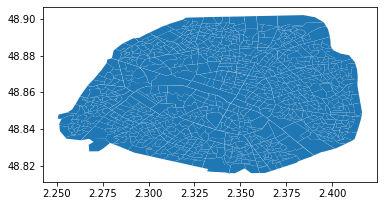

In [432]:
elec.plot()

In [400]:
# Autre base avec les bureaux de vote, aussi interessant c'ets encore plus granulaire mais que Paris faut trouver les autres

In [43]:
elec = pd.read_csv(dir + '\\brut\\PR17_BVot_T1_FE.txt',sep=';',encoding="ISO-8859-1")

C:\Users\morga\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
elec.head()

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Voix.9,% Voix/Ins.9,% Voix/Exp.9,N°Panneau.10,Sexe.10,Nom.10,Prénom.10,Voix.10,% Voix/Ins.10,% Voix/Exp.10
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,1,598,92,"15,38",...,6,"1,00","1,21",11,M,FILLON,François,110,"18,39","22,22"
1,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,1,209,25,"11,96",...,1,"0,48","0,57",11,M,FILLON,François,34,"16,27","19,32"
2,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,1,1116,233,"20,88",...,7,"0,63","0,81",11,M,FILLON,François,116,"10,39","13,49"
3,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,2,1128,256,"22,70",...,11,"0,98","1,29",11,M,FILLON,François,124,"10,99","14,59"
4,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,3,1116,227,"20,34",...,7,"0,63","0,80",11,M,FILLON,François,149,"13,35","17,05"


Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Sexe',
       'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau.1',
       'Sexe.1', 'Nom.1', 'Prénom.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1',
       'N°Panneau.2', 'Sexe.2', 'Nom.2', 'Prénom.2', 'Voix.2', '% Voix/Ins.2',
       '% Voix/Exp.2', 'N°Panneau.3', 'Sexe.3', 'Nom.3', 'Prénom.3', 'Voix.3',
       '% Voix/Ins.3', '% Voix/Exp.3', 'N°Panneau.4', 'Sexe.4', 'Nom.4',
       'Prénom.4', 'Voix.4', '% Voix/Ins.4', '% Voix/Exp.4', 'N°Panneau.5',
       'Sexe.5', 'Nom.5', 'Prénom.5', 'Voix.5', '% Voix/Ins.5', '% Voix/Exp.5',
       'N°Panneau.6', 'Sexe.6', 'Nom.6

In [49]:
elec=elec[['Code du département','Code de la circonscription','Code de la commune','Code du b.vote','Exprimés',
          'Voix','Voix.1','Voix.2','Voix.3','Voix.4','Voix.5','Voix.6','Voix.7',
          'Voix.8','Voix.9','Voix.10']]

In [50]:
elec.groupby(['Code du département','Code de la commune'],as_index=False).sum()

,Code du département,Code de la commune,Code de la circonscription,Exprimés,Voix,Voix.1,Voix.2,Voix.3,Voix.4,Voix.5,Voix.6,Voix.7,Voix.8,Voix.9,Voix.10
0,1,1,4,495,34,126,119,29,4,4,2,2,59,6,110
1,1,2,5,176,6,48,37,13,2,2,0,0,33,1,34
2,1,4,40,6452,346,1667,1332,344,40,91,5,60,1412,71,1084
3,1,5,4,933,45,306,191,37,5,10,0,6,126,10,197
4,1,6,3,77,4,18,15,3,1,2,0,1,19,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,ZZ,226,11,236,1,16,115,10,2,1,0,0,26,3,62
35717,ZZ,227,10,711,13,49,251,63,0,1,0,2,131,4,197
35718,ZZ,228,7,251,8,35,92,14,0,0,0,1,30,6,65
35719,ZZ,229,6,10243,205,622,4672,567,27,61,18,41,1050,87,2893


In [34]:
elec.head()

,Code du département,Code de la circonscription,Code de la commune,Code du b.vote,extreme_droite,macron,gauche,droite
0,1,4,1,1,0.249012,0.235178,0.189723,0.304348
1,1,5,2,1,0.260870,0.201087,0.271739,0.222826
2,1,5,4,1,0.263873,0.176670,0.321631,0.211778
3,1,5,4,2,0.268349,0.209862,0.283257,0.213303
4,1,5,4,3,0.245219,0.214848,0.282340,0.240720


In [39]:
corr = pd.read_csv(dir + '\\brut\\correspondance-code-insee-code-postal.csv',sep=';')

In [41]:
corr=corr[['Code INSEE','Code Commune','Code Département']]

In [51]:
corr.head()

,Code INSEE,Code Commune,Code Département
0,63402,402,63
1,26027,27,26
2,42205,205,42
3,69063,63,69
4,61502,502,61


In [59]:
elec=elec.rename(columns={'Code de la commune':'Code Commune','Code du département':'Code Département'})

In [60]:
elec=corr.merge(elec,how='left',on=['Code Commune','Code Département'])

In [64]:
elec=elec.assign(extreme_droite=elec['Voix.1']/elec.Exprimés)
elec=elec.assign(macron=elec['Voix.2']/elec.Exprimés)
elec=elec.assign(gauche=(elec['Voix.4'] + elec['Voix.5'] + elec['Voix.8'] + elec['Voix.3'] )/elec.Exprimés)
elec=elec.assign(droite=(elec['Voix.10'] + elec['Voix'] +  elec['Voix.6'] +elec['Voix.9']+elec['Voix.7'] )/elec.Exprimés)
elec=elec.assign(abs=(elec['Abstentions'])/elec.Exprimés)
elec=elec[['Code du département','Code de la circonscription','Code de la commune','Code du b.vote','extreme_droite','macron','gauche','droite']]

KeyError: 'Abstentions'